# DW Pose Model test
- Hugging Face [lllyasviel/control_v11p_sd15_openpose](https://huggingface.co/lllyasviel/control_v11p_sd15_openpose) 참고
  - dw pose 모델은 코드 내부를 수정해야해서 바로 사용해볼수 있는 openpose로 먼저 실험

## 1. Openpose : controlnet_aux

In [1]:
# load libraries
import torch
import os
from huggingface_hub import HfApi
from pathlib import Path
from diffusers.utils import load_image
from PIL import Image
import numpy as np

from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

/Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [ ]:
'''
Use this model에 있는 코드
'''

# from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

# controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_openpose")
# pipeline = StableDiffusionControlNetPipeline.from_pretrained(
# 	"runwayml/stable-diffusion-v1-5", controlnet=controlnet
# )

In [2]:
# load model checkpoint
checkpoint = "lllyasviel/control_v11p_sd15_openpose"

- 참고 코드를 뜯어보니 checkpoint는 새로 이미지를 생성할때 사용하는 코드임
- 위 checkpoint를 활용해서 pose를 추출하는건 추가 작업필요

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

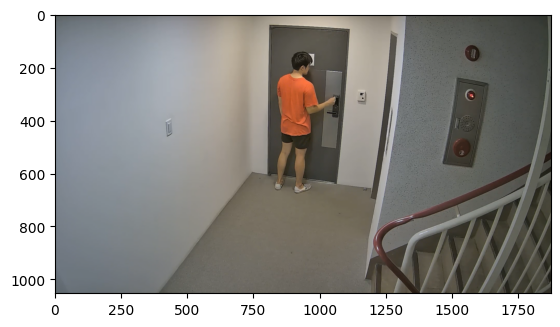

In [5]:
image_path = "./dataset/test_img.png"

image_pil = Image.open(image_path)
image = np.array(image_pil)
plt.imshow(image)
plt.show()

## 이미지 포즈 추출
- 위 이미지 포즈 추출 시도

In [8]:
from controlnet_aux import OpenposeDetector

image = load_image(image_path)
processor = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

control_image = processor(image, hand_and_face=True)
control_image.save("./images/control-pose.png")

/Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CA752DFD-DB79-3AEF-B196-0DE84ACD1E36> /Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <DD14EDEC-57EB-38BD-98C1-58FACE69BBEC> /Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/Users/seullee/.pyenv/versions/3.8.10/envs/control-v11/lib/python3.8/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip

- mediapipe가 없다는 에러 메세지가 뜨긴 했지만 포즈는 추출됨

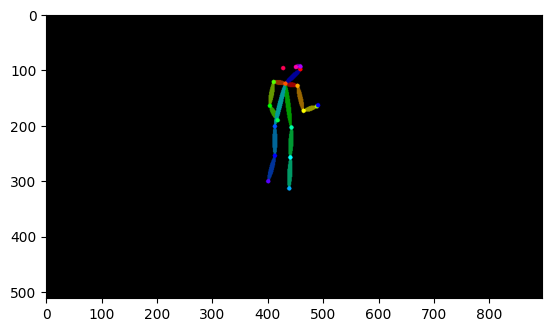

In [9]:
result_image = Image.open("./images/control-pose.png")
result_image_np = np.array(result_image)
plt.imshow(result_image_np)
plt.show()